In [2]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Cargar el conjunto de datos en la variable data
data = pd.read_csv('Mall_Customers.csv', sep=';')

In [6]:
data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

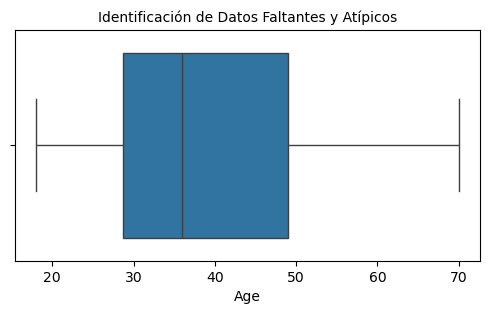

In [14]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

Identificar datos Faltantes

In [18]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

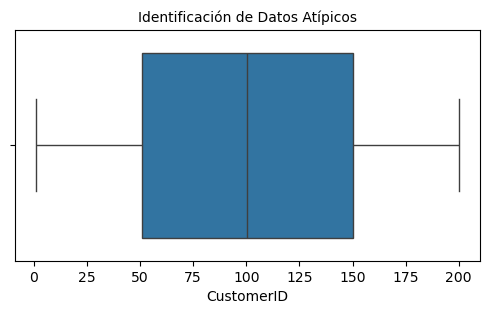

In [20]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['CustomerID'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [24]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [26]:
# Filtra Datos Atípicos

Datos=data[(data['Age']<nivel_maximo)&(data['Age']>nivel_minimo)]

In [28]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [41]:
# Revisión de los datos de las variables objetivo
data.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


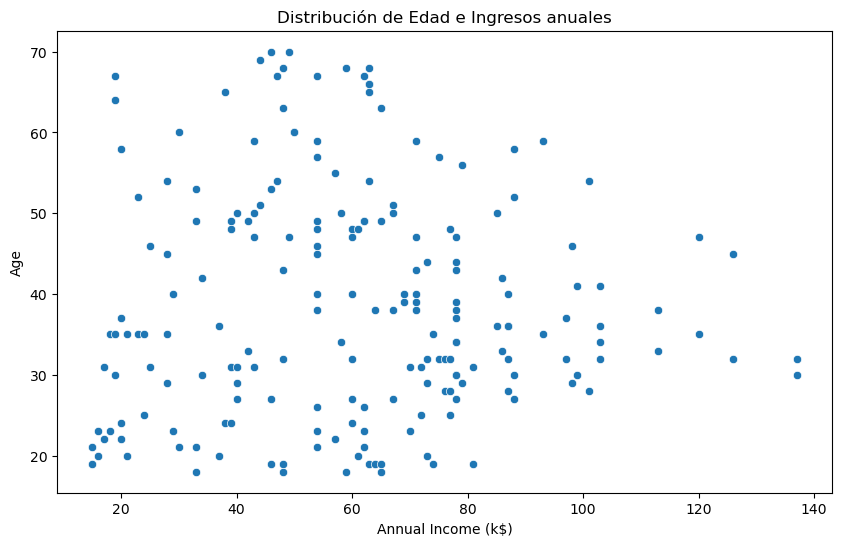

In [53]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Age'])
plt.title('Distribución de Edad e Ingresos anuales')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

4. Entrenar el modelo configurando los diferentes hiperparámetros

In [60]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])

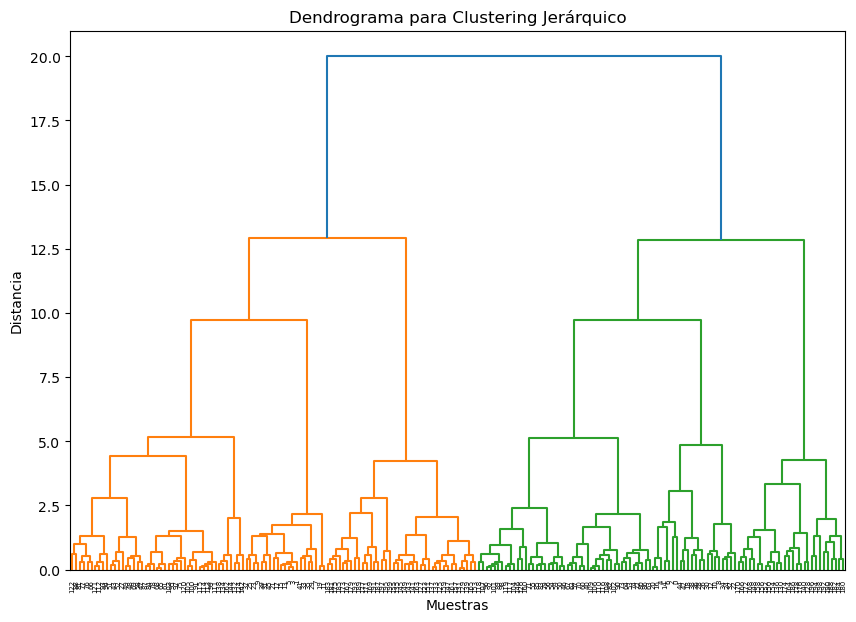

In [62]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [64]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']] = Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].fillna(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Índice de Davies-Bouldin: 1.1277290061047858


6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

- Gráfico de Dispersión para Visualización de Clusters

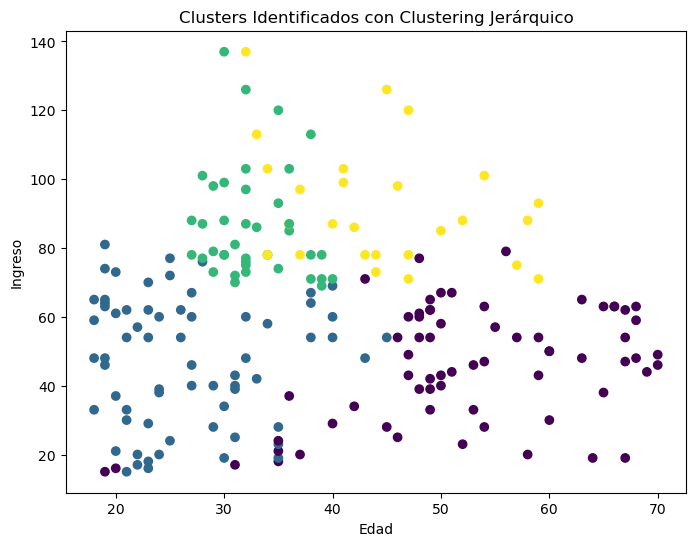

In [72]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
data['Cluster'] = model.fit_predict(scaled_data)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis')  # Asegúrate de usar 'data'
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

Silhouette Score: 0.3614512741691407


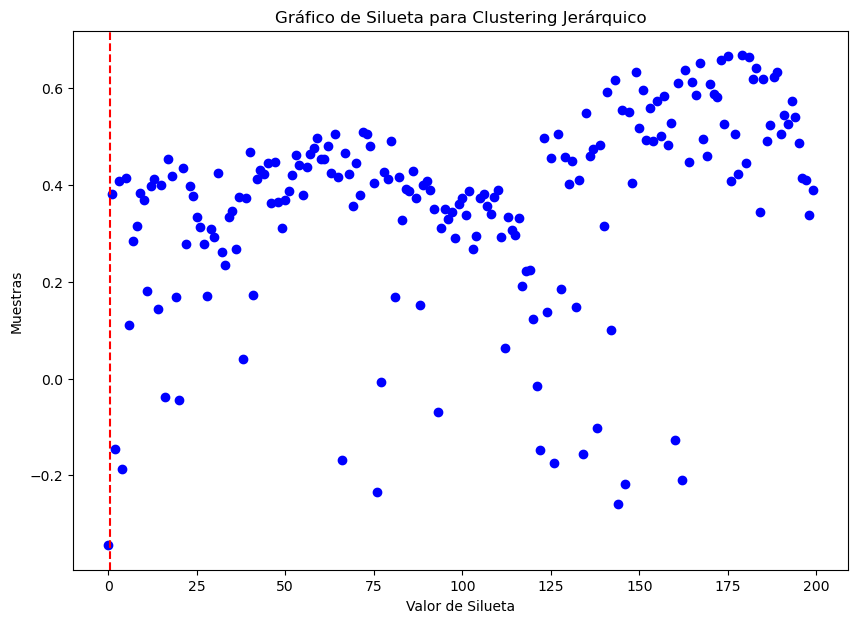

In [74]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

7. Interpretar, analizar y documentar los resultados obtenidos

El conjunto de datos no tiene valores faltantes, ya que todas las columnas contienen exactamente 200 valores no nulos. Esto es positivo para la integridad de los análisis posteriores. El rango de edades parece concentrarse entre aproximadamente 30 y 40 años (zona central de la caja), aunque se extiende entre los 20 y 70 años. Esto sugiere una población adulta joven a media.
- La variable "Age" y "CustomerID" no presenta datos atípicos.
  
 No hay una correlación clara entre la edad y los ingresos anuales. La dispersión de los puntos es aleatoria, sin mostrar una tendencia o patrón definido.
- Existe una distribución amplia en ambos ejes. Se observa una gran variedad de edades y niveles de ingresos en el grupo de personas.
- Se observan concentraciones de puntos en ciertos rangos. Por ejemplo, hay un grupo considerable de personas con edades entre 30 y 40 años, y otra concentración entre 50 y 60 años.
- El rango de ingresos anuales es más amplio que el rango de edades. Se puede apreciar que hay personas con ingresos muy bajos y muy altos, mientras que la edad está más concentrada en un rango más estrecho.

Coeficiente de Silhouette: El coeficiente de silhouette es una medida de la calidad del clustering. Un valor cercano a 1 indica que los puntos de datos están bien agrupados y separados de otros clusters. En este caso, el coeficiente de silhouette es de 0.32148866683112387, lo que sugiere una calidad de agrupamiento moderada.

Índice de Calinski-Harabasz: El índice de Calinski-Harabasz mide la razón entre la varianza entre clusters y la varianza dentro de los clusters. Un valor alto indica una buena separación entre los clusters. En este caso, el índice de Calinski-Harabasz es de 88.10174149244529, lo que indica una buena separación entre los clusters.

Índice de Davies-Bouldin: El índice de Davies-Bouldin mide la similitud entre los clusters. Un valor bajo indica una buena separación entre los clusters. En este caso, el índice de Davies-Bouldin es de 1.1277290061047858, lo que indica una separación moderada entre los clusters.

Clústeres con Clustering Jerárquico:

- Clúster Verde y Amarillo: Representan grupos con ingresos más altos y una distribución más uniforme en cuanto a la edad. Podrían corresponder a personas con mayor experiencia profesional o mayores niveles de educación.
- Clúster Morado: Indica un grupo con menor ingreso en comparación a los otros clusters, pero con una mayor amplitud en cuanto a la edad. Podrían corresponder a personas que han estado en la fuerza laboral por más tiempo o que tienen carreras profesionales menos remuneradas.
- Clúster Azul: Muestra un grupo con menor ingreso y edades más jóvenes, posiblemente representando a personas que recién comienzan su trayectoria profesional.

Gráfico de Silueta:

El gráfico de silueta sugiere una calidad razonable del clustering jerárquico, indicando que la mayoría de las muestras se agrupan con otras muestras similares. Sin embargo, la presencia de algunas muestras con valores de silueta más bajos (menores de 0.2) sugiere que podría haber algunas muestras mal clasificadas.